<span style="color:black; font-family: 'Arial'; font-size: 1.5em;">
**CS 180: Artificial Intelligence  
Machine Problem 2**</span>

 #  An Artificial Neural Network for the Poker Hand Classification Problem
------
<span style="color:black; font-family: 'Arial'; font-size: 1.5em;">
**By Don Abril and Micah Tan**</span>

# Introduction
<p> Poker is (arguably) one of the most popular family of card games, and is one that involves gambling. In general, Poker is a luck-based game whose players rely on the strengths of the best combinations that arise from cards in play, dealt from a standard 52-card deck.</p>

![A Friend In Need](http://www.bhmpics.com/walls/dogs_playing_poker-normal.jpg)

<p>In this problem, we want to classify instances of 5-card combinations from a data set into the poker hands that describe them. Do note that for this project, the order of these cards affect the poker hand determinations.</p>

<p>The **Poker Hand Data Set** taken from the UCI Machine Learning Repository is used for this problem. The raw data set from the site has been converted to a CSV file with an appropriate structure for the purposes of this project. However, the pertinent data within remain the exact same. </p>

<p>The Poker Hand Data Set has 11 integer-valued attributes. 10 of these pertain to each card's (from a 5-card combination) suit and rank. These attributes are intuitively named <code>card1_suit</code>, <code>card1_rank</code>, <code>card2_suit</code>, <code>card2_rank</code>, ..., <code>card5_suit</code>, and <code>card5_rank</code>. Suit values range from 1 to 4, while rank values range from 1 to 13. The remaining attribute, <code>poker_hand</code>, is the classification whose values range from 0 to 9 representing the various possible poker hand categories. Refer to the following table for the mapping of these numbers to poker hands.

| poker_hand | in English |
| :--------- |:---------- |
| 0          | High Card  |
| 1          | One pair   |
| 2          | Two pairs  |
| 3          | Three of a kind |
| 4          | Straight   |
| 5          | Flush      |
| 6          | Full house |
| 7          | Four of a kind  |
| 8          | Straight flush  |
| 9          | Royal flush     |

# Getting started
------
# Importing pertinent modules

In [2]:
import pandas
import seaborn
import matplotlib.pyplot as plt
# IPython magic function that allows the output of plotting commands to be displayed here
%matplotlib inline 
from sklearn.utils import shuffle # function for shuffling dataframes
from sklearn.preprocessing import MinMaxScaler # object to be used for scaling/normalizing data
from sklearn.neural_network import MLPClassifier # The Multilayer Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Useful information for data analysis

# Loading the Poker Hand data sets

### After they were loaded, they were also shuffled using the <code>shuffle</code> function from sci-kit learn

In [3]:
train_set = pandas.read_csv('poker_train.csv')
train_set = shuffle(train_set)
train_set

,card1_suit,card1_rank,card2_suit,card2_rank,card3_suit,card3_rank,card4_suit,card4_rank,card5_suit,card5_rank,poker_hand
9300,1,8,4,9,3,8,1,5,4,10,1
9045,1,7,4,9,2,3,4,11,2,1,0
7371,4,9,2,4,3,3,2,5,2,12,0
11812,4,7,3,5,2,11,3,10,1,9,0
22408,1,9,1,10,3,7,1,3,3,8,0
18009,1,4,2,11,2,9,4,6,1,8,0
8503,1,10,2,6,2,4,3,7,1,5,0
11623,3,10,3,11,2,5,1,7,3,8,0
20104,4,4,2,6,2,10,1,3,2,7,0
16724,3,1,2,12,4,4,4,2,2,3,0


In [4]:
test_set = pandas.read_csv('poker_test.csv')
test_set = shuffle(test_set)
test_set

,card1_suit,card1_rank,card2_suit,card2_rank,card3_suit,card3_rank,card4_suit,card4_rank,card5_suit,card5_rank,poker_hand
774439,3,8,2,13,4,3,4,7,1,4,0
95311,4,1,2,1,3,3,4,10,1,3,2
772245,3,10,4,2,1,13,1,3,1,11,0
445944,1,10,4,3,3,10,1,6,2,1,1
704783,4,3,1,8,3,13,3,2,2,11,0
384576,3,3,3,7,3,4,4,5,4,13,0
512075,2,5,1,6,3,9,4,3,3,2,0
586774,2,12,3,1,2,7,2,3,3,3,1
517070,3,9,4,1,3,13,2,13,4,10,1
252132,2,3,4,4,4,3,2,5,4,13,1


# Preparing the data set for training and testing

### The poker_hand (class) column is clipped off, using the <code>drop</code> function, for both training and test data sets.

In [5]:
x_train = train_set.drop('poker_hand',axis=1)
x_train

,card1_suit,card1_rank,card2_suit,card2_rank,card3_suit,card3_rank,card4_suit,card4_rank,card5_suit,card5_rank
9300,1,8,4,9,3,8,1,5,4,10
9045,1,7,4,9,2,3,4,11,2,1
7371,4,9,2,4,3,3,2,5,2,12
11812,4,7,3,5,2,11,3,10,1,9
22408,1,9,1,10,3,7,1,3,3,8
18009,1,4,2,11,2,9,4,6,1,8
8503,1,10,2,6,2,4,3,7,1,5
11623,3,10,3,11,2,5,1,7,3,8
20104,4,4,2,6,2,10,1,3,2,7
16724,3,1,2,12,4,4,4,2,2,3


In [6]:
x_test = test_set.drop('poker_hand',axis=1)
x_test

,card1_suit,card1_rank,card2_suit,card2_rank,card3_suit,card3_rank,card4_suit,card4_rank,card5_suit,card5_rank
774439,3,8,2,13,4,3,4,7,1,4
95311,4,1,2,1,3,3,4,10,1,3
772245,3,10,4,2,1,13,1,3,1,11
445944,1,10,4,3,3,10,1,6,2,1
704783,4,3,1,8,3,13,3,2,2,11
384576,3,3,3,7,3,4,4,5,4,13
512075,2,5,1,6,3,9,4,3,3,2
586774,2,12,3,1,2,7,2,3,3,3
517070,3,9,4,1,3,13,2,13,4,10
252132,2,3,4,4,4,3,2,5,4,13


### The <code>poker_hand</code> values for both sets are then assigned to new DataFrames.

In [7]:
y_train = train_set['poker_hand']
y_test = test_set['poker_hand']

print ("poker_hand attribute, TRAINING SET")
print (y_train, "\n\n")
print ("poker_hand attribute, TEST SET")
print (y_test, "\n\n")

poker_hand attribute, TRAINING SET
9300     1
9045     0
7371     0
11812    0
22408    0
18009    0
8503     0
11623    0
20104    0
16724    0
18643    1
24017    0
13177    1
166      1
6392     0
11655    0
4123     1
3104     0
18969    2
21221    0
4556     0
19302    0
2493     0
14284    1
15997    1
23393    0
7622     0
15280    2
19911    1
1418     0
        ..
20513    3
9369     0
24853    1
8380     0
9716     1
15459    0
24193    0
3691     0
5228     1
15628    0
9641     2
3767     1
20416    0
9841     0
21067    1
4373     1
6676     0
7566     0
13865    1
24076    0
12568    1
2365     0
13837    1
4730     0
19569    0
20825    0
6459     1
18463    1
16834    0
4478     1
Name: poker_hand, Length: 25010, dtype: int64 


poker_hand attribute, TEST SET
774439    0
95311     2
772245    0
445944    1
704783    0
384576    0
512075    0
586774    1
517070    1
252132    1
80870     1
211014    1
203103    1
491299    0
715398    0
40922     0
116222    1
134442    

### Using sci-kit learn's <code>MinMaxScaler</code>, the data is scaled to the range [-1, 1] as preparation before being fed into the hyperbolic tangent activation function of the multilayer perceptron.

In [8]:
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [9]:
x_train

array([[ -1.00000000e+00,   1.66666667e-01,   1.00000000e+00, ...,
         -3.33333333e-01,   1.00000000e+00,   5.00000000e-01],
       [ -1.00000000e+00,  -2.22044605e-16,   1.00000000e+00, ...,
          6.66666667e-01,  -3.33333333e-01,  -1.00000000e+00],
       [  1.00000000e+00,   3.33333333e-01,  -3.33333333e-01, ...,
         -3.33333333e-01,  -3.33333333e-01,   8.33333333e-01],
       ..., 
       [ -3.33333333e-01,   5.00000000e-01,   3.33333333e-01, ...,
         -6.66666667e-01,   3.33333333e-01,   3.33333333e-01],
       [ -1.00000000e+00,  -1.66666667e-01,  -3.33333333e-01, ...,
         -3.33333333e-01,  -3.33333333e-01,  -1.00000000e+00],
       [ -1.00000000e+00,  -3.33333333e-01,   3.33333333e-01, ...,
         -5.00000000e-01,  -3.33333333e-01,   1.66666667e-01]])

In [10]:
x_test

array([[  3.33333333e-01,   1.66666667e-01,  -3.33333333e-01, ...,
         -2.22044605e-16,  -1.00000000e+00,  -5.00000000e-01],
       [  1.00000000e+00,  -1.00000000e+00,  -3.33333333e-01, ...,
          5.00000000e-01,  -1.00000000e+00,  -6.66666667e-01],
       [  3.33333333e-01,   5.00000000e-01,   1.00000000e+00, ...,
         -6.66666667e-01,  -1.00000000e+00,   6.66666667e-01],
       ..., 
       [ -1.00000000e+00,  -1.00000000e+00,  -3.33333333e-01, ...,
          6.66666667e-01,   3.33333333e-01,   6.66666667e-01],
       [  3.33333333e-01,  -1.66666667e-01,  -1.00000000e+00, ...,
         -8.33333333e-01,   3.33333333e-01,  -8.33333333e-01],
       [ -1.00000000e+00,  -6.66666667e-01,   3.33333333e-01, ...,
         -8.33333333e-01,   1.00000000e+00,   1.66666667e-01]])

# Training the Multi-layer Perceptron ANN model

#### Two hidden layers are included in the perceptron's structure, with 10 and 8 nodes, respectively.
#### The learning rate is set to 0.005.
#### The hyperbolic tangent function (<code>tanh</code>) is set as the perceptron's activation function.

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 8),max_iter=10000,learning_rate_init=0.005,activation='tanh')
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8), learning_rate='constant',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Predictions are made using the recently trained MLP.



In [12]:
train_pred = mlp.predict(x_train)
test_pred = mlp.predict(x_test)

### The above predictions are checked against the target outputs, <code>y_train</code> and <code>y_test</code>.



In [13]:
# Deriving the confusion matrices of the training and test data sets
train_cnf = confusion_matrix(y_train, train_pred)
test_cnf = confusion_matrix(y_test,test_pred)

# Deriving classification reports from the predictions and target values
train_classreport = classification_report(y_train,train_pred)
test_classreport = classification_report(y_test,test_pred)

# Getting the accuracy scores
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

C:\Users\DonRodolfo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Shown below are the confusion matrix, classification report, and accuracy score for the TRAINING data set.

In [14]:
print (train_cnf, "\n")
print (train_classreport)
print ("Training set accuracy:", train_acc)

[[10909  1584     0     0     0     0     0     0     0     0]
 [ 7822  2777     0     0     0     0     0     0     0     0]
 [  766   440     0     0     0     0     0     0     0     0]
 [  270   243     0     0     0     0     0     0     0     0]
 [   39    54     0     0     0     0     0     0     0     0]
 [   53     1     0     0     0     0     0     0     0     0]
 [   22    14     0     0     0     0     0     0     0     0]
 [    4     2     0     0     0     0     0     0     0     0]
 [    3     2     0     0     0     0     0     0     0     0]
 [    3     2     0     0     0     0     0     0     0     0]] 

             precision    recall  f1-score   support

          0       0.55      0.87      0.67     12493
          1       0.54      0.26      0.35     10599
          2       0.00      0.00      0.00      1206
          3       0.00      0.00      0.00       513
          4       0.00      0.00      0.00        93
          5       0.00      0.00      0.00      

### Shown below are the confusion matrix, classification report, and accuracy score for the TEST data set.

In [15]:
print (test_cnf, "\n")
print (test_classreport)
print ("Test set accuracy:", test_acc)

[[437297  63912      0      0      0      0      0      0      0      0]
 [315024 107474      0      0      0      0      0      0      0      0]
 [ 31338  16284      0      0      0      0      0      0      0      0]
 [ 11779   9342      0      0      0      0      0      0      0      0]
 [  1733   2152      0      0      0      0      0      0      0      0]
 [  1857    139      0      0      0      0      0      0      0      0]
 [   739    685      0      0      0      0      0      0      0      0]
 [    83    147      0      0      0      0      0      0      0      0]
 [     8      4      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]] 

             precision    recall  f1-score   support

          0       0.55      0.87      0.67    501209
          1       0.54      0.25      0.35    422498
          2       0.00      0.00      0.00     47622
          3       0.00      0.00      0.00     21121
 

### The training set accuracy score is 0.5475 (54.75%), whilst the test set accuracy score is 0.5443 (54.43%).
### Accuracy score percent variance is 0.0031439996, or around 0.314%.
### The low prediction accuracies for both datasets and the minimal variance suggests that the model is underfitted.
### Another performance measure is the F1 score, which is the "harmonic average of the precision and recall." Note that both F1 scores with respect to classifying samples from the training and test datasets are 0.48, suggesting that the multilayer perceptron ANN model performed equally for both datasets.

# But why these low scores?

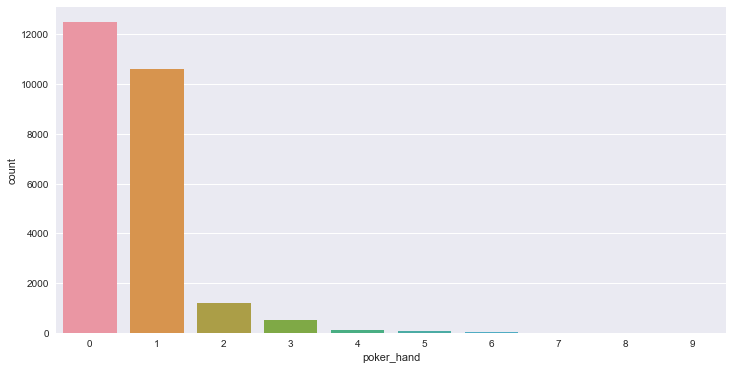

In [16]:
dimensions = (12, 6)
fig, ax = plt.subplots(figsize=dimensions)

seaborn.countplot(x="poker_hand", data=train_set, ax=ax)

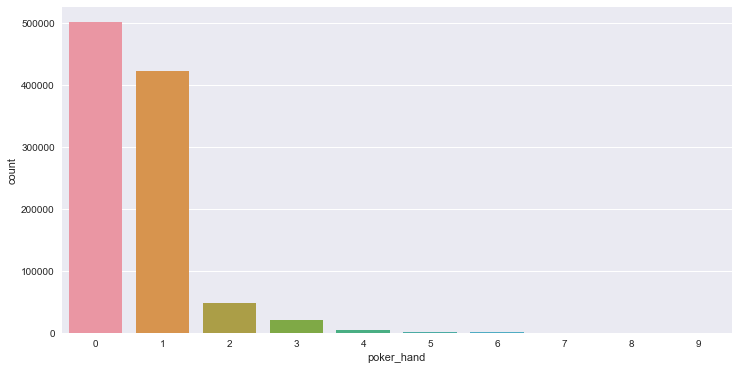

In [17]:
dimensions = (12, 6)
fig, ax = plt.subplots(figsize=dimensions)

seaborn.countplot(x="poker_hand", data=test_set, ax=ax)

In [18]:
# UNUSED CODE HERE

'''
plt.figure(figsize = (16,5))
plt.xlabel('Predicted value')
plt.ylabel('True value')
seaborn.set(font_scale=1.3)
seaborn.heatmap(train_cnf, annot=True, cbar=False)




<span style="color:black; font-family: 'Arial'; font-size: 1.5em;">
**CS 180: Artificial Intelligence  
Machine Problem 2**</span>
'''

'\nplt.figure(figsize = (16,5))\nplt.xlabel(\'Predicted value\')\nplt.ylabel(\'True value\')\nseaborn.set(font_scale=1.3)\nseaborn.heatmap(train_cnf, annot=True, cbar=False)\n\n\n\n\n<span style="color:black; font-family: \'Arial\'; font-size: 1.5em;">\n**CS 180: Artificial Intelligence  \nMachine Problem 2**</span>\n'